<a href="https://colab.research.google.com/github/rmnmndz11/Ejercicios_clase/blob/main/Copy_of_Valuacion_de_opciones_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> Movimiento browniano

La colección de variables aleatorias $X(t), t \geq 0$ es un **movimiento browniano** de parámetros $\mu$ y $\sigma^2$ si satisface:  

* $X(0)$ es una constante dada.

* Para todo $y$ y $t$ positivos, la variable aleatoria $X(t+y)-X(y)$ es independiente de los valores del proceso hasta el  tiempo $y$ y tiene una distribución normal con media $μt$ y varianza $t \sigma^2$

Comentarios.

* El proceso queda determinado solo por el valor presente y ninguno del pasado el que determina los valores futuros.
* $X(t)$ es, con probabilidad 1, una función continua de $t$.
* Pero no es diferenciable.
* EL movimiento browniano es el límite de modelos más simples, como las caminatas aleatorias (del modelo binomial).

### <font color='blue'> Movimiento Browniano Geometrico

Sea  $X(t), t \geq 0$ un movimiento browniano de parámetros $\mu$ y $\sigma^2$, y sea:
    
$$S(t)=e^{X(t)}, t \geq 0$$

El proceso $S(t), t \geq 0$ se dice que es un movimiento browniano geometrico con parámetros $\mu$ y $\sigma^2$.
    

Entonces:

$$\log \Bigg( \frac{S(t+y)}{S(y)} \Bigg)$$

es independiente del proceso y tiene distribución normal con media $\mu t$ y varianza $\sigma^2 t$.

#### Modelación de las acciones.

Si $P_t$ es el precio de una acción en el tiempo $t$, entonces el rendimiento logaritmizado
es $R_t = \log(\frac{P_t}{P_{t-1}})$, para $t=1,2,3...$ y normalmente ocurre que:

$$R_t \sim N(\mu, \sigma)$$

El uso del rendimiento logaritmizado se justifica como una buena aproximación:

$$R_t \approx \frac{P_t - P_{t-1}}{P_{t-1}}$$

debido a que el orden de los rendimientos es de $10^{-3}$ y se hace uso de $\log (1 + x) \approx x$.

Ahora, si se reescribe la cantidad $\frac{P_t}{P_0}$ como:

$$\frac{P_t}{P_0} = \frac{P_t}{P_{t-1}} \cdot \frac{P_{t-1}}{P_{t-2}} \cdot \frac{P_{t-2}}{P_{t-3}} \cdot ... \cdot \frac{P_2}{P_1} \cdot \frac{P_1}{P_0} $$

Al tomar el logaritmo:

$$\log( \frac{P_t}{P_0}) = R_t + R_{t-1} + ... + R_2 + R_1$$

Si suponemos que los rendimientos $R_i$ son independientes y tienen una misma distribución,
con $E[R_i]= \mu$ y $V[R_i]=\sigma^2$, entonces para $t$ grande, por el teorema central del límite esto
sigue una distribución normal (para más de 30 días) y se tendrá:

$$E \Bigg[\log \frac{P_t}{P_o} \Bigg]= E[R_t]+E[R_{t-1}]+...+E[R_1]= t\mu$$


$$V \Bigg[\log \frac{P_t}{P_o} \Bigg]= V[R_t]+V[R_{t-1}]+...+V[R_1]= t\sigma^2$$

Y se tendría que:

$$\log \Bigg( \frac{P_t}{P_0} \Bigg) \sim N(\mu t, \sigma \sqrt t)$$

Por lo que se puede escribir:

$$P_t=P_0 e^{\mu t +\sigma \beta_t}$$

donde $\beta_t$ es un movimiento browniano en $(0,t)$ y $E[\beta_t]=0$ y $V[\beta_t]=t$

Y la igualdad anterior también se puede escribir como:

$$P_t=P_0 e^{\mu t + \sigma \sqrt t z}$$

donde $z \sim N(0,1)$.

Esta última ecuación nos permite ya construir una simulación.

In [ ]:
from random import gauss
from math import exp
import matplotlib.pyplot as plt

In [ ]:
mu=0.001
sigma=0.04  #sigma
p0=10
t=30

In [ ]:
def trayectoria(mu,sigma,p0,t):
    l=[p0]
    pt=p0
    for i in range(t):
        pt=pt*exp(mu + sigma*gauss(0,1))
        l.append(pt)
    return l

In [ ]:
l=trayectoria(mu, sigma,p0,t)

In [ ]:
print(l)

[10, 9.446821004313241, 9.449525260420454, 9.89008912971212, 10.024427449076228, 9.424205923602603, 9.980979987729611, 10.057740173714494, 9.501107524025736, 9.751541277183954, 9.884550608802929, 10.238456872827673, 10.20575996240706, 10.762706062226355, 9.73749149786829, 9.724428825774796, 8.893959152847247, 8.639696157793107, 8.968388105160516, 8.979217182277514, 8.751323455437989, 9.39829871565908, 8.745443083812956, 8.59251494526399, 8.868451634073631, 8.502294206962631, 8.69101574784117, 8.690291635034983, 8.845888298362434, 9.079325279615755, 9.430725684681317]


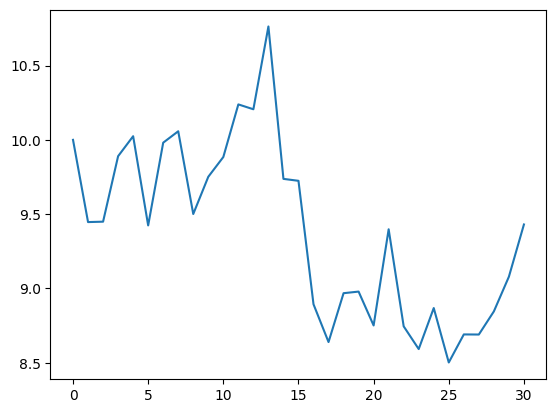

In [ ]:

plt.plot(l)
plt.show()

In [ ]:
mu=0.001
sigma=0.04
p0=10
t=200

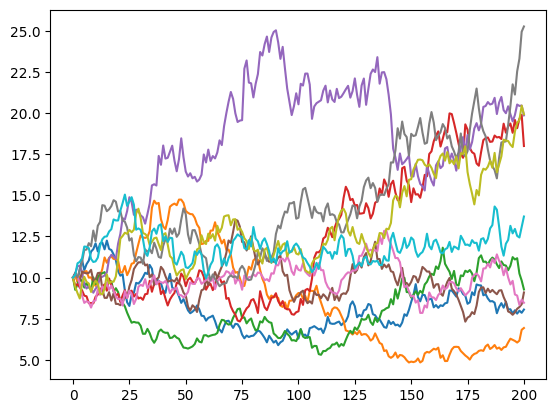

In [ ]:
for i in range(10):
    l=trayectoria(mu,sigma,p0,t)
    plt.plot(l)
plt.show()

#### Ejercicio

Estudiar el comportamiento de las trayectorias al variar $\mu$ y $\sigma$.

Entonces, sabiendo que $P_t=P_0 e^{\mu t +\sigma \beta_t}=P_t=P_0 e^{\mu t + \sigma \sqrt t z}$,
¿cuál es el valor esperado de $P_t$?

Tendríamos:

$$E[P_t]=E[P_0 e^{\mu t + \sigma \sqrt t z}] = P_0 E[e^{\mu t + \sigma \sqrt t z}]$$

Y para poder evaluar esto, necesitamos utilizar la función generadora de momentos:
    
$$\mu_x(s)=e^{\mu s + \frac{\sigma^2 s^2}{2}}$$

De manera que:
    
$$E[P_t]=P_0 e^{(\mu + \frac{\sigma}{2})t}$$

Y la varianza:
    
$$V[P_t]=P_0^2e^{2\mu t}(e^{2t\sigma^2}-e^{t\sigma^2})$$

Pero la cuestión práctica es: ¿Dados los precios de una acción, $P_0, P_1,...,P_t$, ¿cómo estimar $\mu$ y $\sigma$?

Recordando que:

$$R_t \sim N(\mu, \sigma)$$

y

$$\hat{\mu} = \frac{\sum_{t=1}^{T}R_t}{T}$$

y

$$\hat{\sigma}=\sqrt{\frac{1}{T-1} \sum_{t=1}^T (R_t - \hat{\mu})^2}$$

En la práctica, dados:
$$P_0, P_1, P_2, P_3, ...$$

Calculamos:
    
$$R_1=\log(\frac{P_1}{P_0})$$

$$R_1=\log(\frac{P_2}{P_1})$$

$$R_1=\log(\frac{P_3}{P_2})$$

$$R_1=\log(\frac{P_4}{P_3})$$

$$...$$

Y calculamos la media y la desviación estándar de estos valores, y podemos observar que:

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} > 0$, la acción tiende a crecer.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} \approx 0$, la acción tiende a permanecer constante.

* Si $\hat{\mu} + \frac{\hat{\sigma}}{2} < 0$, la acción tiende a decrecer.

Y podemos implementar esto con el siguiente código, usando la librería investpy.

In [ ]:
from statistics import mean,stdev,pstdev
from math import log
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt
%pip install investpy
import investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 37.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 21.4 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481577 sha256=ec11944581e826150bac98532408c613c2c3ef8de108861cea971247ab938162
  Stored in directory: /root/.cache/pip/wheels/db/f4/ae/980b93b0257620bc8e4afc98a854a7a746a33eb8335fd07906
Successfully built investpy


Pero antes, recordemos un poco de Pandas

Cargamos los datos y los guardamos.

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

#especifica el simbolo de acción y el rango de fecha
symbol= "DIS"
start_date = "2022-01-01"
end_date = "2022-05-31"

#obtener los datos utilizando yfinance
df = yf.download(symbol, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


Podemos usar las funciones de Pandas para analizar los datos.

In [ ]:
type(df) # Checamos el tipo de dato

pandas.core.frame.DataFrame

In [ ]:
df.shape # Este es un atributo, no una función. Devuelve (número de renglones, número de columnas)

(102, 6)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,155.830002,157.559998,155.360001,156.759995,156.759995,10222800
2022-01-04,158.589996,160.320007,155.550003,155.729996,155.729996,16582000
2022-01-05,156.520004,159.380005,155.100006,155.190002,155.190002,12272100
2022-01-06,156.240005,157.770004,153.679993,156.899994,156.899994,11095300
2022-01-07,156.899994,159.300003,156.289993,157.830002,157.830002,9554600
...,...,...,...,...,...,...
2022-05-23,103.760002,106.029999,101.559998,105.830002,105.830002,14402400
2022-05-24,103.709999,103.839996,100.129997,101.589996,101.589996,13970200
2022-05-25,101.430000,103.809998,101.160004,103.260002,103.260002,11026600


In [ ]:
print(df.head()) # La función head() muestra los primeros 5 renglones del data frame

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  155.830002  157.559998  155.360001  156.759995  156.759995   
2022-01-04  158.589996  160.320007  155.550003  155.729996  155.729996   
2022-01-05  156.520004  159.380005  155.100006  155.190002  155.190002   
2022-01-06  156.240005  157.770004  153.679993  156.899994  156.899994   
2022-01-07  156.899994  159.300003  156.289993  157.830002  157.830002   

              Volume  
Date                  
2022-01-03  10222800  
2022-01-04  16582000  
2022-01-05  12272100  
2022-01-06  11095300  
2022-01-07   9554600  


Generalmente, comenzamos a analizar un data frame conociendo su tamaño y la información que contiene.

In [ ]:
df.columns # Da el nombre de las columnas

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Cada columna debe ser del mismo tipo, pero un renglón puede tener objetos de diferentes tipos.

In [ ]:
df.dtypes # Da el tipo de objeto que guardan las columnas

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.info() # Esta función da información más amplia

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2022-01-03 to 2022-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       102 non-null    float64
 1   High       102 non-null    float64
 2   Low        102 non-null    float64
 3   Close      102 non-null    float64
 4   Adj Close  102 non-null    float64
 5   Volume     102 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 5.6 KB


Podemos elegir columnas en particular para visualizar.

In [ ]:
c_df=df['Close'] # Elejimos la columna y la guardamos como una nueva variable

In [ ]:
c_df.head() # mostramos los primeros 5 renglones

Date
2022-01-03    156.759995
2022-01-04    155.729996
2022-01-05    155.190002
2022-01-06    156.899994
2022-01-07    157.830002
Name: Close, dtype: float64

In [ ]:
c_df.tail() # mostramos los últimos 5 renglones

Date
2022-05-23    105.830002
2022-05-24    101.589996
2022-05-25    103.260002
2022-05-26    105.610001
2022-05-27    109.320000
Name: Close, dtype: float64

In [ ]:
o_df=df.Open # También podemos elegir la columna nombrandola directamente

In [ ]:
o_df.head()

Date
2022-01-03    155.830002
2022-01-04    158.589996
2022-01-05    156.520004
2022-01-06    156.240005
2022-01-07    156.899994
Name: Open, dtype: float64

In [ ]:
subset=df[['Open','Close']] # Para especificar varias columnas usamos corchetes dobles

In [ ]:
subset.head()

,Open,Close
Date,,
2022-01-03,155.830002,156.759995
2022-01-04,158.589996,155.729996
2022-01-05,156.520004,155.190002
2022-01-06,156.240005,156.899994
2022-01-07,156.899994,157.830002


In [ ]:
subset.head(n=10) # podemos ver más renglones

,Open,Close
Date,,
2022-01-03,155.830002,156.759995
2022-01-04,158.589996,155.729996
2022-01-05,156.520004,155.190002
2022-01-06,156.240005,156.899994
2022-01-07,156.899994,157.830002
2022-01-10,157.979996,156.600006
2022-01-11,156.619995,157.889999
2022-01-12,158.500000,157.800003
2022-01-13,157.699997,155.440002


In [ ]:
subset.tail()

,Open,Close
Date,,
2022-05-23,103.760002,105.830002
2022-05-24,103.709999,101.589996
2022-05-25,101.430000,103.260002
2022-05-26,104.220001,105.610001
2022-05-27,106.889999,109.320000


In [ ]:
subset # se puede imprimir todo

,Open,Close
Date,,
2022-01-03,155.830002,156.759995
2022-01-04,158.589996,155.729996
2022-01-05,156.520004,155.190002
2022-01-06,156.240005,156.899994
2022-01-07,156.899994,157.830002
...,...,...
2022-05-23,103.760002,105.830002
2022-05-24,103.709999,101.589996
2022-05-25,101.430000,103.260002


In [ ]:
subset.ix[0] # revisar: iloc, loe

AttributeError: ignored

In [ ]:
df[50:55]['Close']

Podemos graficar los precios y calcular las estadisticas de los rendimientos logaritmizados

In [ ]:
datos=investpy.get_stock_historical_data(stock="DIS",country="Mexico",from_date="24/05/2021", to_date="24/05/2022")

datos.to_csv("datos.csv")


datos=pd.read_csv("datos.csv",header=0,index_col="Date",parse_dates=True) #le peidmos leer los datos del csv


ts=datos["Close"] #que tome los valores de precio de cierre de la acci+on
print(ts)

lp=[] #creamos una lista vacia para los precios

for i in range(len(ts)):
     lp.append(ts.iloc[i])
plt.plot(lp) #grafica de los precios
plt.show()

#calcular los rendimientos

lr=[] #lista de rendimientos
for i in range(1,len(lp)):
     lr.append((lp[i-1]/lp[i])-1) #para lso rendimientos usamos la formula de el precio de cierre anterior entre el precio de cierre actual menos 1

print(f"\n El rendimiento medio es: {mean(lr)},\n La desviación muestral es: {stdev(lr)} \n La desviación poblacional es: {pstdev(lr)}")




Y podemos visualizar el rendimiento

In [ ]:
lr=[]
for i in range(1,len(lp)):
    lr.append(log(lp[i]/lp[i-1]))
plt.plot(lr)
plt.show()
print(mean(lr), stdev(lr))

Y graficarlos juntos, mostrará las fluctuaciones en los mismos puntos

In [ ]:
fig, ax=plt.subplots(2,1,figsize=(16,8), sharex=True)
ax[0].plot(lp)
ax[1].plot(lr)

#### Opciones

Entonces, Tenemos que $P_t=P_0 e^{\mu t +\sigma \beta_t}$

De manera que:
    
$$E[P_t]=P_0 e^{(\mu + \frac{\sigma}{2})t}$$

Podemos reescribir el precio como:
    
$$P_t=P_0 e^{(\mu - \frac{\sigma}{2})t + \sigma \beta_t}$$

O más convenientemente como:

<font color='blue'>$$P_t=P_0 e^{(\mu - \frac{\sigma}{2})t + \sigma \sqrt{t} z}$$
    
con $z \sim N(0, 1)$

Ahora con:
    
$$E[P_t]=P_0 e^{\mu t}$$

Para el caso de una opción europea (contrato a tiempo fijo), con precio de ejercicio k, al tiempo t.
Se tienen las alternativas:
    
* Si $p>k$ se compra
* Si $p \leq k$ no se compra

El valor esperado de la ganancia es:

$$E[(P_t - k)^t]$$

Y aquí va un desarrollo matemático...

In [ ]:
from random import gauss
from math import exp, sqrt

In [ ]:
def f(p0, t0, t, mu, sigma):
    h=(mu - (sigma**2)/2)*(t-t0) + sigma*sqrt(t-t0)*gauss(0,1)
#    h=(mu - (sigma**2)/2)*(t-t0) + sigma*gauss(0, sqrt(t-t0))
    p=p0*exp(h)
    return p

In [ ]:
n = 1000000
mu = 0.004
sigma = 0.03
p0 = 10
suma = 0

for i in range(n):
    p30 = f(p0, 0, 30, mu, sigma)
    p70 = f(p30, 30, 70, mu, sigma)
    suma = suma + 100*(p70 - p30)/p30
print(suma/n)